In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

In [5]:
def simple_sin_generator(cycle_duration=10,
                   phase_shift=2*np.pi,
                   amplitude=10):
    phase_angle = 2*np.pi / cycle_duration
    while True:
        value = amplitude * np.sin(phase_shift)
        yield value
        phase_shift = np.around((phase_shift + phase_angle) % (2*np.pi), decimals=15)

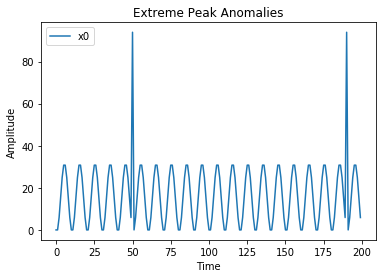

In [6]:
np.random.seed(1337)

STREAM_LENGTH = 200 #Number Of Sample Points
N = 1 #Number of Timeseries to be generated
K = 0 #Number of Timeseries that should correlate

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K,behavior=simple_sin_generator)
df = dg.generate_baseline(initial_value_min=0, initial_value_max=0,noise=False)

df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Extreme Peak Anomalies');
plt.show()

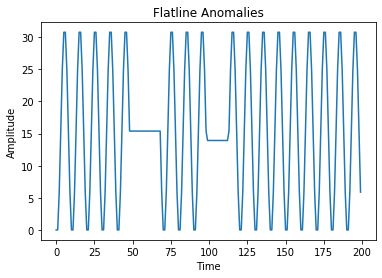

In [7]:
np.random.seed(1337)

STREAM_LENGTH = 200 #Number Of Sample Points
N = 1 #Number of Timeseries to be generated
K = 0 #Number of Timeseries that should correlate

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K,behavior=simple_sin_generator)
df = dg.generate_baseline(initial_value_min=0, initial_value_max=0,noise=False)

df = dg.add_outliers({'flatline':[{'n': 0, 'timestamps': [(49, 68), (99, 113)]}]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Flatline Anomalies');
plt.show()

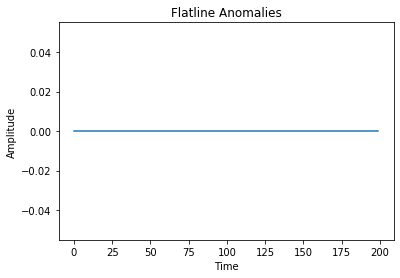

In [8]:
np.random.seed(1337)

STREAM_LENGTH = 200 #Number Of Sample Points
N = 1 #Number of Timeseries to be generated
K = 0 #Number of Timeseries that should correlate

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=0, initial_value_max=0,noise=False)

df = dg.add_outliers({'flatline':[{'n': 0, 'timestamps': [(49, 68), (99, 113)]}]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Flatline Anomalies');
plt.show()

In [2]:
df_test_fn = pd.read_csv('df_TEST_ENTITY_FOR_FLATLINEANOMALYGENERATOR.csv')

In [3]:
df_test_fn.head(10)

,id,evt_timestamp,speed,deviceid,_timestamp,adjusted_speed
0,73000,2020-01-22 16:11:12.531005,0.790322,73000,2020-01-22 16:11:12.531005,1.580645
1,73001,2020-01-22 16:12:12.531005,0.654237,73001,2020-01-22 16:12:12.531005,1.308474
2,73001,2020-01-22 16:13:12.531005,-1.082771,73001,2020-01-22 16:13:12.531005,-2.165543
3,73002,2020-01-22 16:14:12.531005,-0.206242,73002,2020-01-22 16:14:12.531005,-0.412485
4,73004,2020-01-22 16:15:12.531005,-0.324331,73004,2020-01-22 16:15:12.531005,-0.648661
5,73001,2020-01-22 16:16:12.531005,-0.894523,73001,2020-01-22 16:16:12.531005,-1.789046
6,73004,2020-01-22 16:17:12.531005,0.473646,73004,2020-01-22 16:17:12.531005,0.947292
7,73002,2020-01-22 16:18:12.531005,-0.738416,73002,2020-01-22 16:18:12.531005,-1.476831
8,73003,2020-01-22 16:19:12.531005,0.522686,73003,2020-01-22 16:19:12.531005,1.045371
9,73004,2020-01-22 16:20:12.531005,-0.248713,73004,2020-01-22 16:20:12.531005,-0.497426


In [4]:
df_test_fn.shape

(1446, 6)

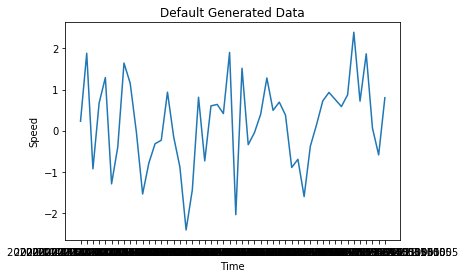

In [5]:
df_sample = df_test_fn.sample(50)
plt.plot(df_sample.evt_timestamp,df_sample.speed)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Default Generated Data');
plt.show()

In [197]:
df_test_fn = pd.read_csv('df_TEST_ENTITY_FOR_FLATLINEANOMALYGENERATOR.csv')
step = 3 #Create anomaly at every 3rd point
timestamps_indexes = []
grp_length = {} #Retrieve the group counts from cos

#Mimics the actual dataframes coming in the execute method of Extreme Anomaly Generator
for time_splits in np.array_split(df_test_fn.iloc[25:75],3):
    df_sample = time_splits
    df_sample.reset_index(inplace=True)
    
    #***********Execute method starts for Anomaly Generator**************
    #Group by entity_ids
    df_grpby =df_sample.groupby('id')
    for grp in df_grpby.__iter__():

        entity_grp_id = grp[0]
        df_entity_grp = grp[1]
        print('Group id ',grp[0])
        print('Group Indexes',df_entity_grp.index)
        
        for grp_row_index in df_entity_grp.index:
            
            if entity_grp_id in grp_length:
                #Increment count
                grp_length[entity_grp_id] +=1
            else:
                #Initialize count
                grp_length[entity_grp_id] = 1
            # Check if this index count will be an anomaly point
            if grp_length[entity_grp_id]%step == 0:
                timestamps_indexes.append(grp_row_index)
                print('Anomaly Index Value',grp_row_index)
    
    print('***********')
    print('Timestamp',timestamps_indexes)
    # Timestamp indexes will be used to create anomaly
    print('Grp Counts',grp_length)
    #Save the group counts to cos
    #***********Execute method ends for Anomaly Generator**************


Group id  73000
Group Indexes Int64Index([8, 10, 13], dtype='int64')
Anomaly Index Value 13
Group id  73001
Group Indexes Int64Index([2, 4, 6, 9], dtype='int64')
Anomaly Index Value 6
Group id  73002
Group Indexes Int64Index([0, 5, 14], dtype='int64')
Anomaly Index Value 14
Group id  73003
Group Indexes Int64Index([1, 15, 16], dtype='int64')
Anomaly Index Value 16
Group id  73004
Group Indexes Int64Index([3, 7, 11, 12], dtype='int64')
Anomaly Index Value 11
***********
Timestamp [13, 6, 14, 16, 11]
Grp Counts {73000: 3, 73001: 4, 73002: 3, 73003: 3, 73004: 4}
Group id  73000
Group Indexes Int64Index([4, 10, 13], dtype='int64')
Anomaly Index Value 13
Group id  73001
Group Indexes Int64Index([1, 3, 5, 9, 11], dtype='int64')
Anomaly Index Value 3
Anomaly Index Value 11
Group id  73002
Group Indexes Int64Index([0, 2, 12, 14], dtype='int64')
Anomaly Index Value 12
Group id  73003
Group Indexes Int64Index([8], dtype='int64')
Group id  73004
Group Indexes Int64Index([6, 7, 15, 16], dtype='int

In [55]:
class FlatlineOutlierGenerator():
    def __init__(self, timestamps=None, factor=8):
        timestamps = timestamps or []
        self.timestamps = timestamps
        self.factor = factor

    def add_outliers(self, timeseries,input_col):
        print(timeseries.shape)
        
        additional_values = np.zeros(timeseries[input_col].size)
        print(additional_values.shape)
        for start, end in self.timestamps:
            local_mean = timeseries.iloc[max(0, start - 10):end + 10][input_col].mean()
            print(local_mean)
            print(list(range(start, end)))
            print(timeseries.iloc[start:end][input_col], "  ", -timeseries.iloc[start:end][input_col] + local_mean)
            
            additional_values[list(range(start, end))] += -timeseries.iloc[start:end][input_col] + local_mean
            print(additional_values.shape)
            timeseries[input_col] += additional_values
        return timeseries
    
flatline_gen = FlatlineOutlierGenerator(timestamps=[(49, 68), (99, 113)])

In [15]:
df_copy = df_test_fn.head(200)
df_copy.drop(['adjusted_speed'], axis=1,inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
df_copy.sample(5)

,id,evt_timestamp,speed,deviceid,_timestamp
71,73002,2020-01-22 17:22:12.531005,1.378829,73002,2020-01-22 17:22:12.531005
41,73003,2020-01-22 16:52:12.531005,0.370400,73003,2020-01-22 16:52:12.531005
93,73000,2020-01-22 17:44:12.531005,1.252408,73000,2020-01-22 17:44:12.531005
30,73002,2020-01-22 16:41:12.531005,0.780222,73002,2020-01-22 16:41:12.531005
149,73002,2020-01-22 18:40:12.531005,-1.033504,73002,2020-01-22 18:40:12.531005


In [27]:
df_copy.shape

(200, 5)

In [32]:
import logging
import numpy as np
import pandas as pd

from iotfunctions.base import BaseTransformer
from iotfunctions.ui import (UISingle, UIFunctionOutSingle, UISingleItem)
logger = logging.getLogger(__name__)

PACKAGE_URL = 'git+https://github.com/ankit-jha/addCustomIotFn@flatline_anomaly_package'

class FlatlineAnomalyGenerator(BaseTransformer):
    '''
    This function generates flatline anomaly.
    '''

    def __init__(self, input_item, width, factor, output_item):
        self.input_item = input_item
        self.output_item = output_item
        self.width = int(width)
        self.factor = int(factor)
        super().__init__()

    def execute(self, df):
        timeseries = df.reset_index()
        #Create a zero value series
        additional_values = pd.Series(np.zeros(timeseries[self.input_item].size),index=timeseries.index)
        timestamps_indexes = []
        #Divide the timeseries in (factor)number of splits.Each split will have one anomaly
        for time_splits in np.array_split(timeseries,self.factor):
            start = time_splits.sample().index[0]
            end = min(start+self.width,time_splits.index[-1])
            timestamps_indexes.append((start,end))
        #Create flatline anomalies in every split
        for start, end in timestamps_indexes:
            local_mean = timeseries.iloc[max(0, start - 10):end + 10][self.input_item].mean()
            additional_values.iloc[start:end] += local_mean - timeseries[self.input_item].iloc[start:end]
            timeseries[self.output_item] = additional_values + timeseries[self.input_item]

        #timeseries.set_index(df.index.names,inplace=True)
        return timeseries

    @classmethod
    def build_ui(cls):
        inputs = []
        inputs.append(UISingleItem(
                name='input_item',
                datatype=float,
                description='Item to base anomaly on'
                                              ))

        inputs.append(UISingle(
                name='width',
                datatype=int,
                description='Width of the anomaly created- default 100'
                                              ))

        inputs.append(UISingle(
                name='factor',
                datatype=int,
                description='No. of flatline anomalies to be created'
                                              ))

        outputs = []
        outputs.append(UIFunctionOutSingle(
                name='output_item',
                datatype=float,
                description='Generated Item With Flatline anomalies'
                ))
        return (inputs, outputs)

(200, 7)


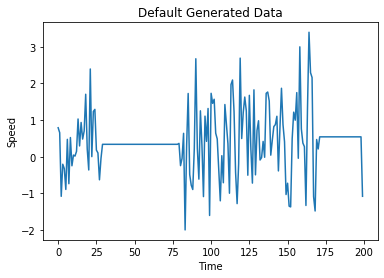

In [33]:
flatline_gen = FlatlineAnomalyGenerator('speed','50','2','output_col')
df_flatline = flatline_gen.execute(df_copy)
print(df_flatline.shape)
plt.plot(df_flatline.index,df_flatline.output_col)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Default Generated Data');
plt.show()

In [162]:
!python -c 'import pandas as pd; print(pd.__version__)'

0.25.3


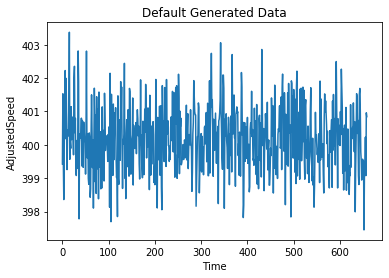

In [57]:
df_test = pd.read_csv('/Users/ankitjha/Repositories/github/functions/_DM_Anomaly_Test_Boiler_Type__202002171424.csv')
df_custom_fn = df_test.reset_index()
plt.plot(df_custom_fn.index,df_custom_fn['VALUE_N'])
plt.xlabel('Time')
plt.ylabel('AdjustedSpeed')
plt.title('Default Generated Data');
plt.show()

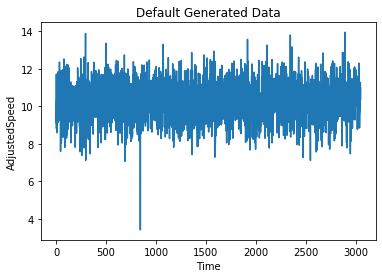

In [18]:
df_test = pd.read_csv('/Users/ankitjha/Repositories/github/functions/DM_ALERT_TEST_202002131402.csv')
df_custom_fn = df_test.reset_index()
plt.plot(df_custom_fn.index,df_custom_fn['VALUE_N'])
plt.xlabel('Time')
plt.ylabel('AdjustedSpeed')
plt.title('Default Generated Data');
plt.show()

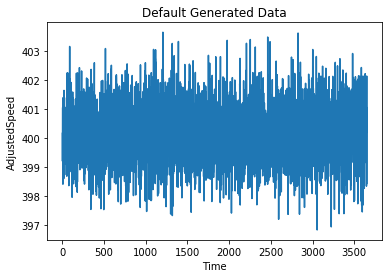

In [59]:
df_test = pd.read_csv('/Users/ankitjha/Repositories/github/functions/_DM_Anomaly_Test_Boiler_Type__202002171558.csv')
df_custom_fn = df_test.reset_index()
plt.plot(df_custom_fn.index,df_custom_fn['VALUE_N'])
plt.xlabel('Time')
plt.ylabel('AdjustedSpeed')
plt.title('Default Generated Data');
plt.show()

In [12]:
import logging
import numpy as np
import pandas as pd

from iotfunctions.base import BaseTransformer
from iotfunctions.ui import (UISingle, UIFunctionOutSingle, UISingleItem)
logger = logging.getLogger(__name__)

PACKAGE_URL = 'git+https://github.com/ankit-jha/addCustomIotFn@extreme_anomaly_package'

class ExtremeAnomalyGenerator(BaseTransformer):
    '''
    This function generates extreme anomaly.
    '''

    def __init__(self, input_item, factor, size, output_item):
        self.input_item = input_item
        self.output_item = output_item
        self.factor = int(factor)
        self.size = int(size)
        super().__init__()

    def execute(self, df):
        timeseries = df.copy().reset_index()
        #Create a zero value series
        #additional_values = timeseries[self.input_item].copy()
        #additional_values.loc[:,:] = 0
        additional_values = pd.Series(np.zeros(timeseries[self.input_item].size),index=timeseries.index)
        timestamps_indexes = []
        #Divide the timeseries in (factor)number of splits.Each split will have one anomaly
        for time_splits in np.array_split(timeseries,self.factor):
            start = time_splits.sample().index[0]
            timestamps_indexes.append(start)
        #Create extreme anomalies in every split
        for start  in timestamps_indexes:
            local_std = timeseries[self.input_item].iloc[max(0, start - 10):start + 10].std()
            additional_values.iloc[start] += np.random.choice([-1, 1]) * self.size * local_std
            timeseries[self.output_item] = additional_values + timeseries[self.input_item]

        #timeseries.set_index(df.index.names,inplace=True)
        return timeseries

    @classmethod
    def build_ui(cls):
        inputs = []
        inputs.append(UISingleItem(
                name='input_item',
                datatype=float,
                description='Item to base anomaly on'
                                              ))

        inputs.append(UISingle(
                name='factor',
                datatype=int,
                description='No. of extreme anomalies to be created'
                                              ))

        inputs.append(UISingle(
                name='size',
                datatype=int,
                description='Size of extreme anomalies to be created. e.g. 10 will create 10x size extreme anomaly compared to the normal variance'
                                              ))

        outputs = []
        outputs.append(UIFunctionOutSingle(
                name='output_item',
                datatype=float,
                description='Generated Item With Extreme anomalies'
                ))
        return (inputs, outputs)


(200, 7)


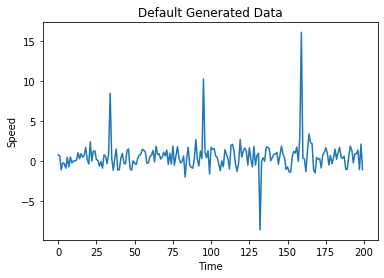

In [13]:
extreme_gen = ExtremeAnomalyGenerator('speed','4','10','output_col')
df_flatline = extreme_gen.execute(df_copy)
print(df_flatline.shape)
plt.plot(df_flatline.index,df_flatline.output_col)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Default Generated Data');
plt.show()

In [1]:
!python -c "import pandas as pd;print(pd.__version__)"

0.24.0


In [2]:
!python -c "import numpy as pd;print(pd.__version__)"

1.17.3


In [7]:
import logging
import numpy as np
import pandas as pd

from iotfunctions.base import BaseTransformer
from iotfunctions.ui import (UISingle, UIFunctionOutSingle, UISingleItem)
logger = logging.getLogger(__name__)

PACKAGE_URL = 'git+https://github.com/ankit-jha/addCustomIotFn@nodata_anomaly_package'

class NoDataAnomalyGenerator(BaseTransformer):
    '''
    This function generates nodata anomaly.
    '''

    def __init__(self, input_item, width, factor, output_item):
        self.input_item = input_item
        self.output_item = output_item
        self.width = int(width)
        self.factor = int(factor)
        super().__init__()

    def execute(self, df):
        timeseries = df.copy().reset_index()
        #Create a zero value series
        additional_values = pd.Series(np.zeros(timeseries[self.input_item].size),index=timeseries.index)
        timestamps_indexes = []
        #Divide the timeseries in (factor)number of splits.Each split will have one anomaly
        for time_splits in np.array_split(timeseries,self.factor):
            start = time_splits.sample().index[0]
            end = min(start+self.width,time_splits.index[-1])
            timestamps_indexes.append((start,end))
        #Create flatline anomalies in every split
        for start, end in timestamps_indexes:
            additional_values.iloc[start:end] += np.NaN
            timeseries[self.output_item] = additional_values + timeseries[self.input_item]

        #timeseries.set_index(df.index.names,inplace=True)
        return timeseries

    @classmethod
    def build_ui(cls):
        inputs = []
        inputs.append(UISingleItem(
                name='input_item',
                datatype=float,
                description='Item to base anomaly on'
                                              ))

        inputs.append(UISingle(
                name='width',
                datatype=int,
                description='Width of the anomaly created- default 100'
                                              ))

        inputs.append(UISingle(
                name='factor',
                datatype=int,
                description='No. of nodata anomalies to be created'
                                              ))

        outputs = []
        outputs.append(UIFunctionOutSingle(
                name='output_item',
                datatype=float,
                description='Generated Item With NoData anomalies'
                ))
        return (inputs, outputs)


In [8]:
df_copy = df_test_fn.head(200)
df_copy.drop(['adjusted_speed'], axis=1,inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(200, 7)


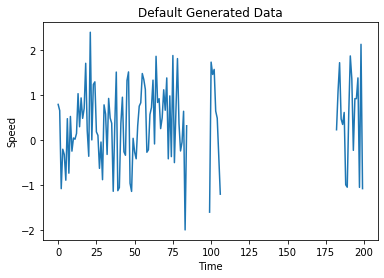

In [9]:
nodata_gen = NoDataAnomalyGenerator('speed','75','2','output_col')
df_flatline = nodata_gen.execute(df_copy)
print(df_flatline.shape)
plt.plot(df_flatline.index,df_flatline.output_col)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Default Generated Data');
plt.show()